**CP 7.1:** $$ $$ Write Python programs to calculate the coefficients in the discrete Fourier transforms
of the following periodic functions sampled at $N = 1000$ evenly spaced points, and make plots
of their amplitudes similar to the plot shown in Fig 7.4:

In [4]:
###imports####
from numpy.fft import rfft, irfft, rfft2, irfft2
import numpy as np
import scipy as sp
from scipy import signal
import math
import matplotlib.pyplot as plt

a) A single cycle of a square-wave with amplitude 1

Text(0.5, 1.0, 'Fourier Transform of a Square-wave with Amplitude 1')

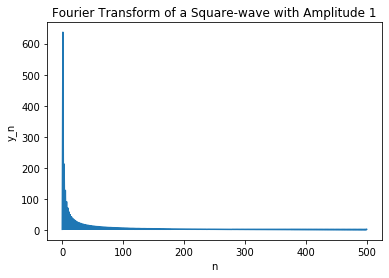

In [5]:
N = 1000
def f(n):
    return signal.square(2 * math.pi * n)
ans = []
x = np.linspace(0, 1, N)
for i in (x):
    ans.append(f(i))
coeff = rfft(ans)
plt.plot(abs(coeff))
plt.xlabel('n')
plt.ylabel('y_n')
plt.title('Fourier Transform of a Square-wave with Amplitude 1')

b) THe sawtooth wave $y_n = n$

Text(0.5, 1.0, 'Fourier Transform of Sawtooth Wave')

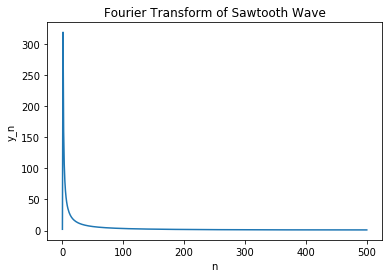

In [7]:
def y(n):
    return signal.sawtooth(2 * math.pi * n)
ans_b = []
for i in (x):
    ans_b.append(y(i))
coeff_b = rfft(ans_b)
plt.plot(abs(coeff_b))
plt.xlabel('n')
plt.ylabel('y_n')
plt.title('Fourier Transform of Sawtooth Wave')

c) The modulated sine wave $y_n = sin(\pi n / N) sin(20 \pi n/ N)$

Text(0.5, 1.0, 'Fourier Transform of Modulated Sine Wave')

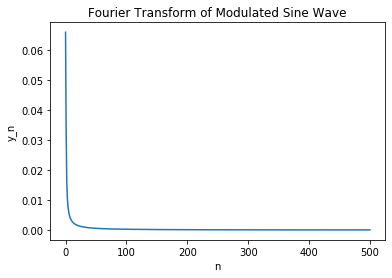

In [9]:
def y(n):
    return math.sin(math.pi * n / N) * math.sin(20 * math.pi * n / N)
ans_c = []
for i in (x):
    ans_c.append(y(i))
coeff_c = rfft(ans_c)
plt.plot(abs(coeff_c))
plt.xlabel('n')
plt.ylabel('y_n')
plt.title('Fourier Transform of Modulated Sine Wave')

**CP 7.2:** $$ $$ In the on-line resources there is a file called sunspots.txt, which 
contains the observed number of sunspots on the Sun for each month since January 1749.
The file contains two columns of numbers, the first representing the month 
and the second being the sunspot number.

a) Write a program that reads the data in the file and makes a graph of sunspots as a function of time. You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded. Make an estimate of the length of the cycle in months 


Looks like a cycle is about 100 Months


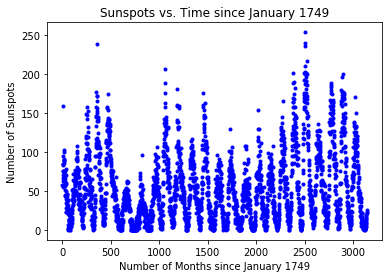

In [11]:
#data processing
sunspots_data = np.loadtxt('sunspots.txt', float)
time = sunspots_data[:, 0]
spots = sunspots_data[:, 1]
plt.plot(time, spots, 'b.')
plt.title('Sunspots vs. Time since January 1749')
plt.xlabel('Number of Months since January 1749')
plt.ylabel('Number of Sunspots')
print('Looks like a cycle is about 100 Months')

b) Modify your program to calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared $|c_k|^2$ of the Fourier coefficients as a function of k $-$ also called the power spectrum of the sunspot signal. You should see that there is a noticiable peak in the power spectrum at a nonzero value of $k$. The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it $-$ meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.

Text(0, 0.5, 'Magnitude squared of Fourier coefficients')

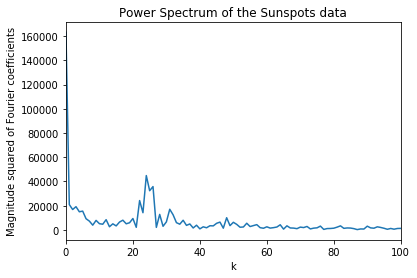

In [13]:
coeff = rfft(spots)
plt.plot(abs(coeff))
plt.xlim(0, 100)
plt.title('Power Spectrum of the Sunspots data')
plt.xlabel('k')
plt.ylabel('Magnitude squared of Fourier coefficients')

c) Find the approxiamte value of k to which the peak corresponds. What is the period of the sine wave with this value of k? You should find that the period corresponds roughly to the length of hte cycle that you estimated in (a). 

We estimate the peak at around k = 22

$a = 60000 / (2\pi)$ $\sqrt{a} \sim 100$

**CP 7.3:** $$ $$ In the on-line resources you will find files called piano.txt and trumpet.txt,
which contain data representing the waveform of a single note, played on, respectively,
a piano and a trumpet.

a) Write a program that loads a waveform from one of these files, plots it, then calculates its 
discrete Fourier transform and plots the magnititudes of the first 10000 coefficients in a manner similar to Fig 7.4.
Note that you will have to use a fast Fourier transform for the calculation because there are too many samples in the files 
to do the transforms the slow way in any reasonable amount of time. $$ $$
Apply your program to the piano and trumpet waveforms and discuss briefly what one can conclude about the sound 
of the piano and trumpet from the plots of Fourier coefficients.

In [14]:
### load data
piano_data = np.loadtxt('piano.txt', float)
trumpet_data = np.loadtxt('trumpet.txt', float)

Text(0.5, 1.0, 'Piano Data')

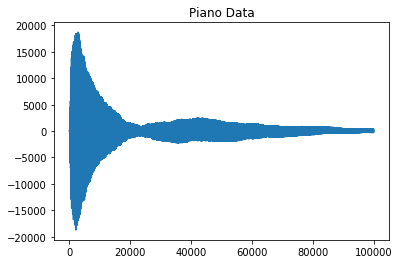

In [15]:
### Data Plot Piano
plt.plot(piano_data)
plt.title('Piano Data')

Text(0.5, 1.0, 'Trumpet Data')

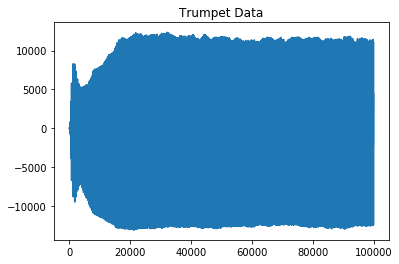

In [16]:
### Data Plot Trumpet
plt.plot(trumpet_data)
plt.title('Trumpet Data')

(0, 10000)

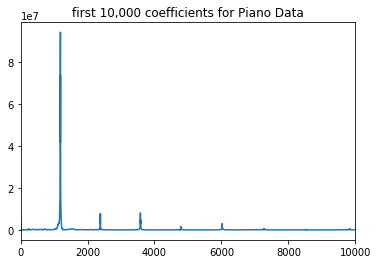

In [18]:
### calculate and Plot discrete Fourier Transform first 10000 coefficients Piano
coeff = rfft(piano_data)
plt.plot(abs(coeff))
plt.title('first 10,000 coefficients for Piano Data')
plt.xlim(0, 10000)

(0, 10000)

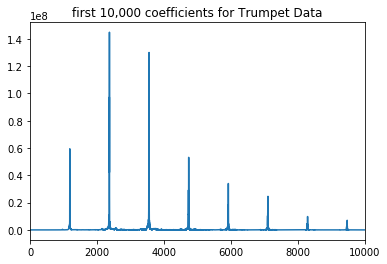

In [19]:
### calculate and Plot discrete Fourier Transform first 10000 coefficients Trumpet
coeff = rfft(trumpet_data)
plt.plot(abs(coeff))
plt.title('first 10,000 coefficients for Trumpet Data')
plt.xlim(0, 10000)

b) Both waveforms were recorded at the industry-standard rate of 44100 samples per second and both instruments were playing 
the same musical note when the recordings were made. From your Fourier transform results calculate what note they were playing. (Hint:
The musical note middle C has a frequency of 261 Hz.)

It means that they are playing the note at different octaves, and the sound quality is different for each instrument.

**CP 7.4: Fourier filtering and smoothing** $$ $$
IN the on-line resources you'll find a file called dow.txt. It contains the daily closing value for each business day 
from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market. $$ $$
a) Read in the data from dow.txt and plot them on a graph


Text(0, 0.5, 'Value')

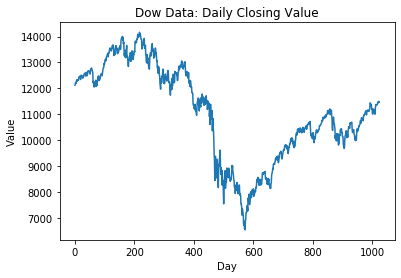

In [20]:
dow_data = np.loadtxt('dow.txt', float)
plt.plot(dow_data)
plt.title('Dow Data: Daily Closing Value')
plt.xlabel('Day')
plt.ylabel('Value')

b) Calculate the coefficients of the discrete Fourier transform of the data using the function rfft from numpy.fft, which produces an array of $\frac{1}{2} N + 1$ 
complex numbers.

In [21]:
coeff = rfft(dow_data)

c) Now set all but the first 10% of the elements of this array to zero(i.e., set the last 90%
to zero but keep the values of the first 10%).

In [22]:
ten_perc = .1 * len(coeff)
for i in range(len(coeff)):
    if i > ten_perc:
        coeff[i] = 0

d) Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function irfft,
and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph.
Comment on waht you see. What is happening when you set the Fourier coefficients to zero? 

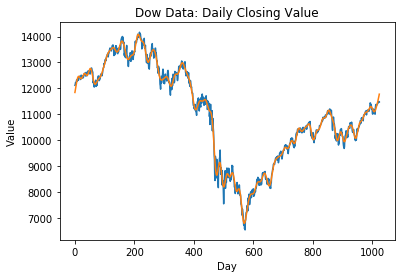

In [23]:
inverse = irfft(coeff)
plt.plot(dow_data)
plt.title('Dow Data: Daily Closing Value')
plt.xlabel('Day')
plt.ylabel('Value')
plt.plot(inverse)

e) Modify your program so that it sets all but the first 2% of the coefficients to zeros and run it again. 

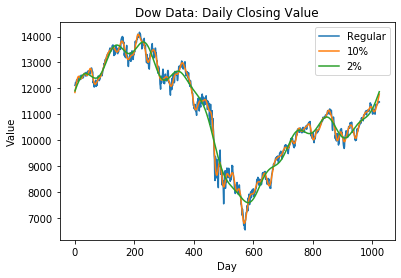

In [24]:
coeff = rfft(dow_data)
two_perc = .02 * len(coeff)
for i in range(len(coeff)):
    if i > two_perc:
        coeff[i] = 0

inverse_e = irfft(coeff)
plt.plot(dow_data)
plt.title('Dow Data: Daily Closing Value')
plt.xlabel('Day')
plt.ylabel('Value')
plt.plot(inverse)
plt.plot(inverse_e)
plt.legend(['Regular', '10%', '2%'])

**CP 7.5:** $$ $$ 
The function $f(t)$ represents a square wave with amplitude 1 and frequency 1 Hz:
$$f(t) = 1 \ if \ \floorleft 2t \floorright \ is \ even, \ and \ -1 \ if \ \floorleft 2t \floorright \ is \ odd,$$
where $\floorleft x \floorright$ means $x$ rounded down to the next lowest integer. Let us attempt to smooth
this function using a Fourier transform, as we did in the previous exercise. Write a program that creates an array of $N = 1000$ elements
containing a thousand equally spaced samples from a single cycle of this square-wave. Calculate the discrete Fourier transform of the array.
Now set all but the first ten Fourier coefficients to zero, then invert the Fourier transform again to recover the smoothed signal. make a plot of 
the result and on the same axes show the original square-wave as well. You should find that the signal is not simply smoothed $-$ there are artifacts, wiggles, 
in the results. Explain briefly where these come from. $$ $$
Artifacts similar to these arise when Fourier coefficients are discarded in audio and visual compression schemes like those described in Section 7.3.1 and are primary 
source of imperfections in digitally compressed sound and images.

Text(0.5, 1.0, 'Square Function and Its Fourier Transform')

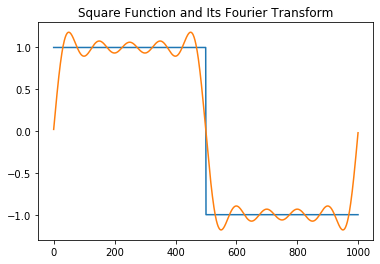

In [26]:

N = 1000
samples = np.linspace(0, 1, 1000)
values = np.zeros(N)
for i in range(N):
    if i == (N - 1):
        values[i] = -1
    elif math.floor(2 * samples[i]) % 2 == 0:
        values[i] = 1
    else:
        values[i] = -1

coeff = rfft(values)
for j in range(len(coeff)):
    if j > 9:
        coeff[j] = 0

inverse = irfft(coeff)
plt.plot(values)
plt.plot(inverse)
plt.title('Square Function and Its Fourier Transform')

**CP 7.9**

a) On the website you will find a file called blur.txt that contains a grid of values representing brightness on a black-and-white photo $-$
a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. Write a program
that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot. 
You should see the photo appear.

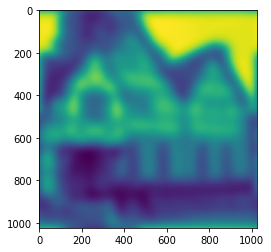

In [27]:
blur_data = np.loadtxt('blur.txt')
plt.imshow(blur_data)

b) Write another program that creates an array, of the same size as the photo, containing a grid of samples drawn from the Gaussian $f(x,y)$ above with $\sigma = 25$.
Make a density plot of these values on the screen too, so that you get a visualization of your point spread function. Remember that the point spread function is periodic (along both
axes), which means that the values for negative x and y are repeated at the end of hte interval. Since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners 
of your picture.

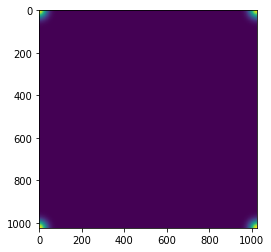

In [29]:
sigma = 25
def f(x, y):
    L_top = math.exp(-(x**2 + y**2) / (2 * sigma**2))
    R_top = math.exp(-((x - 1024)**2 + y**2) / (2 * sigma**2))
    L_bottom = math.exp(-(x**2 + (y - 1024)**2) / (2 * sigma**2))
    R_bottom = math.exp(-((x - 1024)**2 + (y - 1024)**2) / (2 * sigma**2))
    return L_top + R_top + L_bottom + R_bottom

size = len(blur_data)
Gaussian = np.zeros([size, size])
for i in range(size):
    for j in range(size):
        Gaussian[i][j] = f(i, j)

plt.imshow(Gaussian)

c) Combine your two programs and add Fourier transforms using the functions rfft2 and irfft2 from numpy.fft, to make a program that does the following: $$ $$
i) Reads in the blurred photo $$ $$
ii) Calculates the point spread function $$ $$
iii) Fourier transforms both $$ $$
iv) Divides one by the other $$ $$
v) Performs an inverse transform to get the unblurred photo $$ $$
vi) Displays the unblurred photo on the screen.

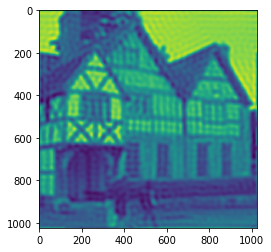

In [34]:
blur_data = np.loadtxt('blur.txt')


sigma = 25
def f(x, y):
    L_top = math.exp(-(x**2 + y**2) / (2 * sigma**2))
    R_top = math.exp(-((x - 1024)**2 + y**2) / (2 * sigma**2))
    L_bottom = math.exp(-(x**2 + (y - 1024)**2) / (2 * sigma**2))
    R_bottom = math.exp(-((x - 1024)**2 + (y - 1024)**2) / (2 * sigma**2))
    return L_top + R_top + L_bottom + R_bottom

size = len(blur_data)
Gaussian = np.zeros([size, size])
for i in range(size):
    for j in range(size):
        Gaussian[i][j] = f(i, j)
coeff_1 = rfft2(blur_data)
coeff_2 = rfft2(Gaussian)
coeff_3 = np.copy(coeff_2)
for i in range(size):
    for j in range(int(size / 2) + 1):
        if coeff_2[i][j] < 10**-3:
            coeff_3[i][j] = coeff_1[i][j]
        else:
            coeff_3[i][j] = coeff_1[i][j] / coeff_2[i][j]
inverse = irfft2(coeff_3)
plt.imshow(inverse)


d) What is it that limits our ability to deblur a photo? Why can we not perfectly unblur any photo and make it completely sharp?

The initial image quality limits our ability to deblur a photo. We cannot unblur any photo and make it completely sharp due to the limitations of the Fourier Transform. 